<a href="https://colab.research.google.com/github/wisdom3D/pandas/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

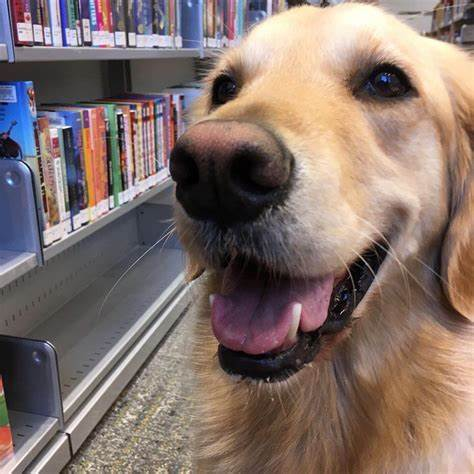

In [ ]:
# importation des modules necessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

**COLLECTE DE DONNEES**

In [ ]:
#chargement des données d'archive dans un dataframe
df_arch = pd.read_csv('/content/twitter-archive-enhanced.csv')

In [ ]:
#telechargé les données vis raquest
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [ ]:
#chargement des données de prediction d'image dans un dataframe
df_imgprediction = pd.read_csv('/content/image-predictions.tsv', sep = '\t')

code pour accéder a l'API de twitter

In [ ]:
def connect_twitter():
    with open("twitter_credentials.json", "r") as file:
        creds = json.load(file)
    consumer_key    = creds['consumer_key']
    consumer_secret = creds['consumer_secret']
    access_token = creds['access_token']
    access_token_secret = creds['access_token_secret']

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    return tweepy.API(auth)
twitter_api = connect_twitter()
df_api = pd.DataFrame(columns =['tweet_id','favorite_count','retweet_count'])
not_found_tweets=[]
tweets_ids = df_tweet_archive['tweet_id'].to_list()
#print(len(tweets_ids))
for tweet_id in tweets_ids:
    #print(tweet_id)
    try:
        tweet_page = twitter_api.get_status(tweet_id)
        data = {'tweet_id':tweet_id,
                       'favorite_count':tweet_page.favorite_count,
                       'retweet_count':tweet_page.retweet_count
                      }
        df_api = df_api.append(data,ignore_index=True)
        #print('%s,%s' % (tweet_id, tweet.text.encode('UTF-8')))
    except:
        not_found_tweets.append(tweet_id)

In [ ]:
#chargement des fichiers de tweet dans un dataframe
with open('/content/tweet_json.txt') as file:
    df_tweet = pd.read_json(file, lines= True, encoding = 'utf-8')

**EVALUATION**

In [ ]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
df_imgprediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
df_tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
df_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [ ]:
df_arch.duplicated().sum()

0

In [ ]:
len(df_arch[df_arch.retweeted_status_id.isnull() == False])

181

In [ ]:
df_imgprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
df_imgprediction.duplicated().sum()

0

In [ ]:
df_imgprediction.img_num.unique()

array([1, 4, 2, 3])

In [ ]:
sum(df_imgprediction.jpg_url.duplicated() == True)

66

In [ ]:
df_imgprediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [ ]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [ ]:
df_tweet.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [ ]:
df_tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


**OBSERVATIONS**

In [ ]:
df_tweet.shape

(2354, 31)

**Quality issues**

les noms de chien ne sont pas normalisés

La colonne 'name' a None au lieu de NaN et trop de valeurs non valides.

il y a des retweet dans l'enssemble de donnée

retweeted_status_timestamp et timestamp ne sont pas de type datetime

on a beaucoup de colonnes qui n'on pas des noms explicite

on a des valeurs autre que 10 pour dénominateur

la colonne expanded_urls a des valeurs NaN

Les colonnes ('doggo', 'floofer', 'pupper', 'puppo') ont None pour les valeurs manquantes.

les colonnes commençant par in_reply_to ne devraient pas contenir d’éléments non nuls
________________________________________________________________

**Tidiness issues**

plus d’une observation est remplie pour un chien particulier

source et expanded_urls on plusieurs informations différentes

pour df_tweet nous avons besoin que de ses 3 colonnes id, retweet_count, favorite_count

**NETTOYAGE**

In [ ]:
#copie des donnée utile pour un backup
df_archC = df_arch.copy()
df_imgpredictionC = df_imgprediction.copy()
df_tweetC = df_tweet.copy()

**Define**

remplacé 'None' avec np.nan pour les colonnes (`doggo`, `floofer`, `pupper`, `puppo`).

**Code**

In [ ]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in col_list:
    df_archC[col] = df_archC[col].replace('None', np.nan)

**Test**

In [ ]:
df_archC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

**Define**

extraire les source de tweet

**CODE**

In [ ]:
df_archC.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [ ]:
def donne(x):
    i= x.find('>') + 1
    j =x[i:].find('<')
    return x[i:][:j]

In [ ]:
df_archC.source = df_archC.source.apply(lambda x: donne(x)).astype('category')

Test

In [ ]:
df_archC.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                         'Vine - Make a Scene']

**Define**

Extrayez correctement les scores d’évaluation du texte du tweet  et aussi  le convertire en flottant

**Code**

In [ ]:
df_archC[df_archC.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [ ]:
notation= df_archC[df_archC.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
notation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [ ]:
df_archC.loc[notation.index, 'rating_numerator'] = notation.values
df_archC.rating_numerator = df_archC.rating_numerator.astype('float')

**Test**

In [ ]:
df_archC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   float64 
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

In [ ]:
df_archC.loc[notation.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,NaN,NaN,NaN,NaN


**DEFINE**

Supprimez les ratings et les liens de la colonne texte

**CODE**

In [ ]:
df_archC.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [ ]:
df_archC.text = df_archC.text.str.extract('(.+(?=\s\d+/\d+\s))')

**Test**

In [ ]:
df_archC.text.sample(5)

1736    This is Mike. He is a Jordanian Frito Pilates....
1234    Please don't send in any more polar bears. We ...
494     We only rate dogs. Please don't send in other ...
513                                                   NaN
847     RT @dog_rates: This is Colby. He's currently r...
Name: text, dtype: object

**Define**

Convertire la colonne timestamp en type Datatime

**Code**

In [ ]:
df_archC.timestamp = pd.to_datetime(df_archC.timestamp)

**Test**

In [ ]:
df_archC.timestamp.dtype

datetime64[ns, UTC]

**Define**

suprimé les retweets et replies.

**Code**

In [ ]:
# Cela supprime les retweets dans le tweet json en supprimant toutes les lignes où retweet_status n'est pas nul.
print(df_archC['retweeted_status_id'].notnull().sum())
tweets_copy = df_archC[df_archC['retweeted_status_id'].isna()]

181


**Test**

In [ ]:
# Ci-dessous vérifie que les retweets ont été effectivement supprimés.
tweets_copy['retweeted_status_id'].notnull().sum()

0

In [ ]:
df_archC.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,NaN,NaN,NaN


**Test**

In [ ]:
df_archC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2234 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

**Define**

suprimé le valeurs autres que 10 pour le dénominateur de rating_denominator

**Code**

In [ ]:
df_archC = df_archC[df_archC['rating_denominator'] == 10]

**Test**

In [ ]:
df_archC[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.174038,10.0
std,40.978669,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


**Test**

In [ ]:
df_archC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   category           
 5   text                        2214 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   float64         

**Define**

Créez la colonne 'dog_stage' et supprimez les colonnes ('doggo', 'floofer', 'pupper', 'puppo').

**Code**

In [ ]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_archC['dog_stage'] = df_archC[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
df_archC.dog_stage = df_archC.dog_stage.replace('', np.nan).astype('category')
df_archC = df_archC.drop(columns = cols, axis =1)

 **Test**

In [ ]:
df_archC.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31+00:00,Twitter for iPhone,Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11.0,10,Theodore,NaN
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44+00:00,Twitter for iPhone,Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10.0,10,Colby,NaN
287,838561493054533637,NaN,NaN,2017-03-06 01:26:54+00:00,Twitter for iPhone,This is Walter. His owner has been watching al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838561493...,13.0,10,Walter,NaN


In [ ]:
df_archC.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [ ]:
df_archC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   category           
 5   text                        2214 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   float64         

In [ ]:
df_archC[df_archC.name.str.istitle()].name.unique()
df_archC.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

**Define**

Supprimé la colonne `img_num`

**CODE**

In [ ]:
df_imgprediction.drop('img_num', axis=1, inplace=True)

**Test**

In [ ]:
df_imgprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


**Define**

Créez des colonnes breed et confidence avec les prédictions de confiance les plus élevées et supprimez d’autres colonnes

**Code**

In [ ]:
breed = []
confidence = []
for index, row in df_imgprediction.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_imgprediction['breed'] = breed
df_imgprediction['confidence'] = confidence
df_imgprediction = df_imgprediction[['tweet_id', 'jpg_url', 'breed', 'confidence']]

**Test**

In [ ]:
df_imgprediction.sample(5)

,tweet_id,jpg_url,breed,confidence
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,English_setter,0.677408
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,NaN,NaN
552,677565715327688705,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,basset,0.397295
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,Chesapeake_Bay_retriever,0.488555
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,NaN,NaN


In [ ]:
df_imgprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


**Define**

supprimons les colonnes inutiles de df_tweet

**Code**

In [ ]:
df_tweet.columns 

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
df_tweet = df_tweet[['id', 'retweet_count', 'favorite_count']]

**Test**

In [ ]:
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


**Define**

renommé la colonne id en tweet_id dans df_imgprediction

**Code**

In [ ]:
df_tweet.columns = ['tweet_id', 'retweet_count', 'favorite_count']

**Test**

In [ ]:
df_tweet.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

**Test**

In [ ]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**Define**

merge des données

**Code**

In [ ]:
df = pd.merge( df_tweet, df_imgprediction, on='tweet_id')
df = pd.merge(df_imgprediction, df_archC, on = 'tweet_id')

In [ ]:
df.head(2)

,tweet_id,jpg_url,breed,confidence,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,NaN,NaN,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN


**Stockage**

In [ ]:
df.to_csv('twitter_archive_master.csv')

In [ ]:
import sqlite3
conn = sqlite3.connect('database')
c = conn.cursor()

**visualisations**

 Comparaison des tweets de différentes sources

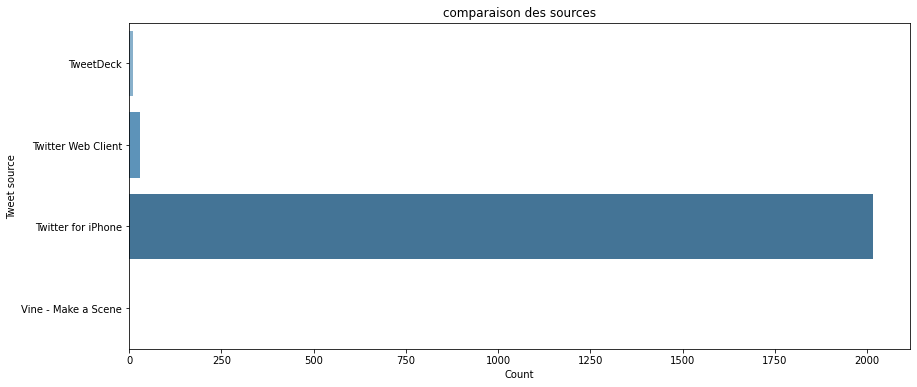

In [ ]:
plt.figure(figsize= (14, 6))
data = df.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.title('comparaison des sources')
plt.show()

la majorité des Tweet viennent de iPhone

Jetons un coup d’œil à la distribution des évaluations en traçant un graphique à barres pour sa fréquence.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


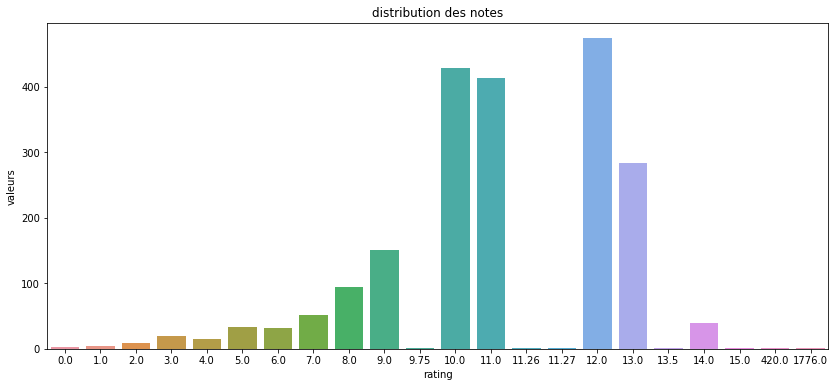

In [ ]:
plt.figure(figsize= (14, 6))
x = df.rating_numerator.value_counts().index
y = df.rating_numerator.value_counts().values
plt.xlabel('rating')
plt.ylabel('valeurs')
plt.title('distribution des notes')
sns.barplot(x, y)
plt.show()

nous avons beacoup de valeurs autour de 10, 11 et 12

comparaison des types de chien selon le classement

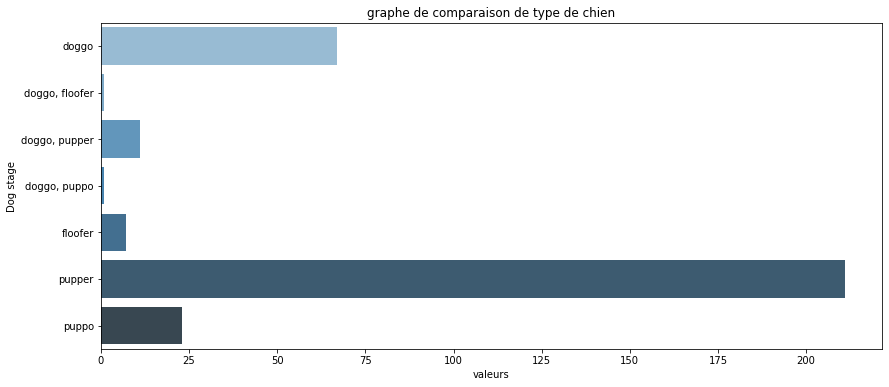

In [ ]:
plt.figure(figsize= (14, 6))
data = df.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='valeurs', ylabel='Dog stage', title='Dog Stage')
plt.title('graphe de comparaison de type de chien')
plt.show()

nous avons plus de pupper suivi de doggo et de puppo